<a href="https://colab.research.google.com/github/junya17/S-P500_predic_linear_regression/blob/main/S%26P500_easy_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰と時系列分析を使ったS&P500の株価予測

このコードは、S&P500の株価予測を目的とした機械学習の練習用プロジェクトです。通常、株価分析ではより複雑な非線形モデルが用いられることが多いですが、ここでは機械学習の基本概念を理解するために、より単純な線形回帰モデルを使用しています。このアプローチでは、特徴量を最小限に抑え、株価動向の基本的な傾向を捉えることを目指しています。また、時系列分析の要素も取り入れているため、時間的な変動を考慮した予測が可能です。本プロジェクトは、株価予測の入門として適しており、より複雑なモデルへの理解を深める足がかりとなります。


In [52]:
# 必要なライブラリをインストール
import pandas as pd  # データ操作
import numpy as np  # 数値計算
import matplotlib.pyplot as plt  # グラフ描画
import seaborn as sns  # 統計的グラフ描画

from sklearn.model_selection import train_test_split  # データセット分割
from sklearn.linear_model import LinearRegression  # 線形回帰モデル
from sklearn.metrics import mean_squared_error  # 誤差計算


In [53]:
#　Kaggleからdataの読み込み

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/all_stocks_5yr.csv')
# 日付の型を確認し、datetime型に変換
data['date'] = pd.to_datetime(data['date'])
# 日付で並び替え
data = data.drop_duplicates(subset='date')
# インデックスを日付に設定
data.set_index('date', inplace=True)

In [54]:
# データフレームの最初の5行を表示する
data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [55]:
# データの基本統計の確認
print(data.describe())

              open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean     38.390495    38.955554    37.825605    38.393252  9.390321e+06
std      10.967086    11.073650    10.843652    10.957636  6.899305e+06
min      13.140000    13.420000    12.700000    13.020000  1.352400e+06
25%      34.205000    34.930000    33.690000    34.330000  5.696393e+06
50%      40.930000    41.429500    40.209900    40.870000  8.111323e+06
75%      46.565000    47.187500    45.990000    46.535000  1.118854e+07
max      58.790000    59.080000    57.800000    58.470000  1.377672e+08


In [56]:
# データフレームの形状を表示する（行数と列数）
data.shape

(1259, 6)

In [ ]:
# 欠損値を調べる
data.isnull().sum()


In [58]:
# 前日の終値で欠損値を補完。
data['close'] = data['close'].fillna(method='ffill')
data['open'] = data['open'].fillna(data['close'].shift(1))
data['high'] = data['high'].fillna(data['close'].shift(1))
data['low'] = data['low'].fillna(data['close'].shift(1))
data['volume'] = data['volume'].fillna(0)  # 出来高は取引がなかった場合0と考えることができます


In [59]:
# もう一度欠損値を調べる
data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

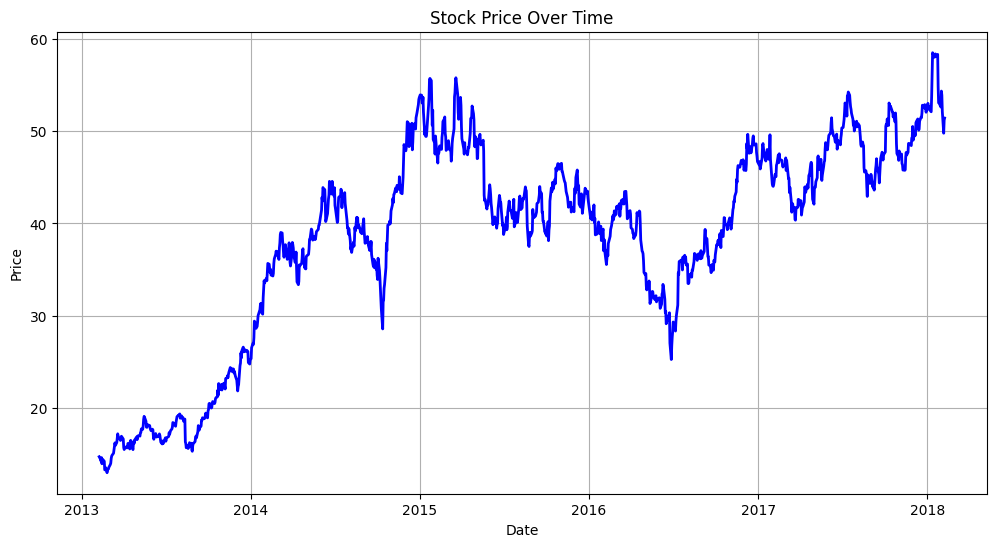

In [65]:
# グラフのサイズを設定する（幅12、高さ6）
plt.figure(figsize=(12, 6))

# 株価の時系列グラフを描画する
# X軸には日付、Y軸には終値を指定し、青色の線で表示する
plt.plot(data.index, data['close'], marker='', color='blue', linewidth=2, linestyle='-')

# グラフのタイトルを設定する
plt.title('Stock Price Over Time')

# X軸のラベル（日付）を設定する
plt.xlabel('Date')

# Y軸のラベル（価格）を設定する
plt.ylabel('Price')

# グリッドを表示する
plt.grid(True)

# グラフを表示する
plt.show()


In [61]:
# 移動平均の計算
data['MA_20'] = data['close'].rolling(window=20).mean()  # 20日移動平均
data['MA_50'] = data['close'].rolling(window=50).mean()  # 50日移動平均

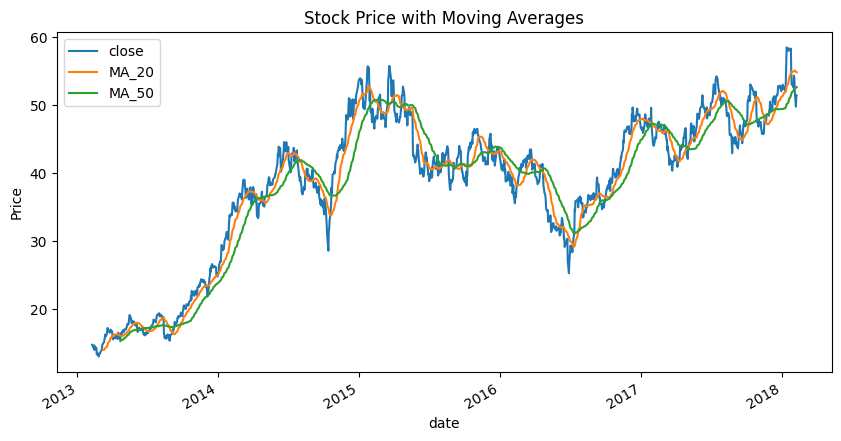

In [62]:
# 移動平均のプロット
data[['close', 'MA_20', 'MA_50']].plot(figsize=(10, 5))
plt.title('Stock Price with Moving Averages')
plt.ylabel('Price')
plt.show()

In [63]:
# 相関係数の計算
correlation = data.corr()
print(correlation)

            open      high       low     close    volume     MA_20     MA_50
open    1.000000  0.999059  0.998799  0.997690 -0.001996  0.981721  0.946353
high    0.999059  1.000000  0.998724  0.998964  0.008243  0.981673  0.946543
low     0.998799  0.998724  1.000000  0.998957 -0.017993  0.979709  0.944045
close   0.997690  0.998964  0.998957  1.000000 -0.004733  0.979645  0.944028
volume -0.001996  0.008243 -0.017993 -0.004733  1.000000  0.007051  0.006381
MA_20   0.981721  0.981673  0.979709  0.979645  0.007051  1.000000  0.979996
MA_50   0.946353  0.946543  0.944045  0.944028  0.006381  0.979996  1.000000


<ipython-input-63-f152c0a273e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<ipython-input-64-7d6ae390b359>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


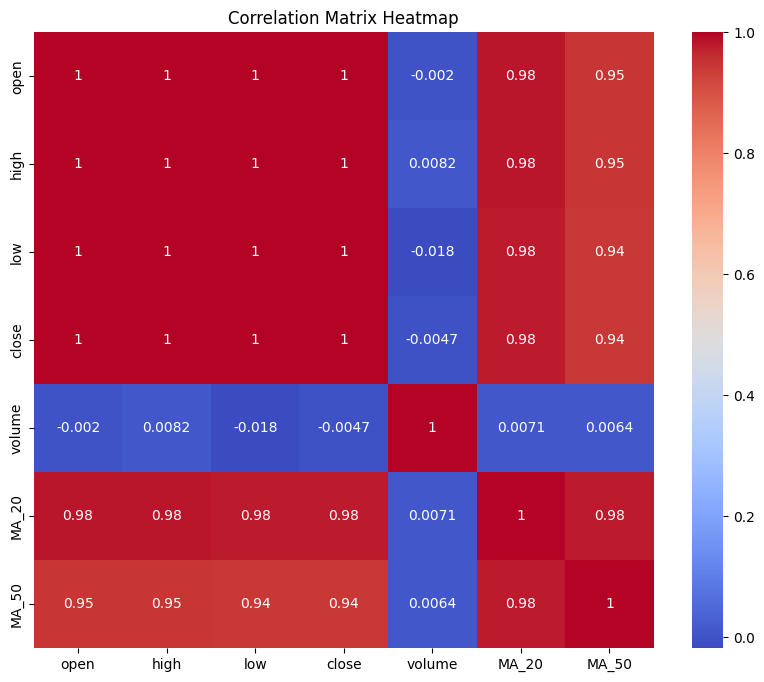

In [64]:
# 相関行列の計算
corr_matrix = data.corr()

# 相関行列のヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [66]:
# 終値の列を1日シフトさせて新しい列を作成（前日の終値）
data['prev_close'] = data['close'].shift(1)

In [67]:
# Nanを調べる
data.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
Name           0
MA_20         19
MA_50         49
prev_close     1
dtype: int64

In [68]:
# NaN値を持つ行を削除
data = data.dropna()

In [69]:
# 特徴量（前日の終値）とラベル（今日の終値）を設定
X = data[['prev_close']]
y = data['close']

In [70]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
# 線形回帰モデルの作成とトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# テストデータで予測
predictions = model.predict(X_test)

In [73]:
# モデルの性能評価
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7861864843719677


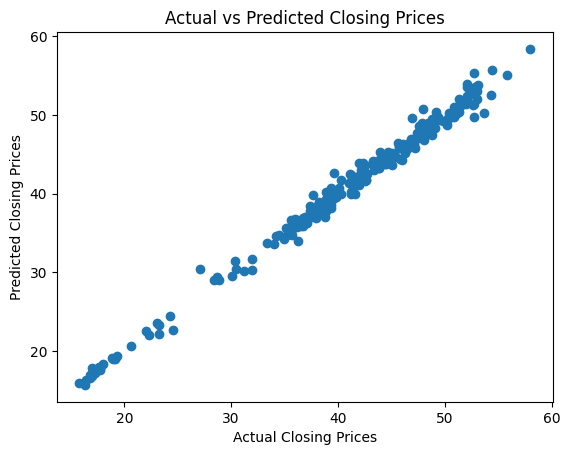

In [74]:
# モデルの精度を評価するために、実際の終値と予測された終値をプロットして比較
import matplotlib.pyplot as plt

# 実際の終値（y_test）と予測された終値（predictions）の散布図を描画
plt.scatter(y_test, predictions)

# X軸に「実際の終値」のラベルを設定
plt.xlabel('Actual Closing Prices')

# Y軸に「予測された終値」のラベルを設定
plt.ylabel('Predicted Closing Prices')

# グラフのタイトルを設定
plt.title('Actual vs Predicted Closing Prices')

# グラフを表示
plt.show()


## 2017年8月25日の株価の予測
まずは、前日の終値を取り出す。
そして、次の日の株価の終値を予測する。

In [108]:
# 2017年8月24日の終値だけを取り出す。
prev_day_close_price = data['close'][data.index == '2017-08-24']

# 予測する前にデータをDataFrameとして2次元形式に変換します。
prev_day_close_price_df = pd.DataFrame(prev_day_close_price)

In [104]:
prev_day_close_price

array([[42.92]])

In [105]:
#25日のデータを確認。
data['close'][data.index == '2017-08-25']

date
2017-08-25    45.25
Name: close, dtype: float64

In [109]:
# 予測用の特徴量データをDataFrameとして作成し、特徴量名を付ける
prev_day_close_price_df = pd.DataFrame(data=[[prev_day_close_price]], columns=['prev_close'])

# 予測を行う
next_day_prediction = model.predict(prev_day_close_price_df)

# 予測結果を表示
print(f"Predicted next day closing price: {next_day_prediction[0]}")


Predicted next day closing price: 42.92171791979185


25日の実際の株価は45.25。予測値は42.92なので全くあってない。
線形回帰は線形なので株価のように非線形なものには向いていない。このコードはあくまでもサンプルとして作成しました。